## Check on GPU


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-09097e12-c1e0-2c21-416b-1084e3dbbf2b)


In [2]:
!wget https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-22 23:45:04--  https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-22 23:45:05 (109 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get Our Data and Download it

In [3]:
# Download data
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip_data
from helper_functions import unzip_data

unzip_data('nlp_getting_started.zip')

--2023-09-22 23:45:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-09-22 23:45:05 (138 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Now, We need to load Our data from CSV files (by pandas)

In [4]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df  = pd.read_csv('/content/test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle our train data
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# Let's show our test_data
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Let's Visualize our data

In [7]:
import random

rand_idx = random.randint(0, len(train_df)-5)

# Loop through our data
for raw in train_df_shuffled[['text', 'target']][rand_idx:rand_idx+5].itertuples():
  # print(raw)
  _, text, target = raw
  print(f'Target:{target}')
  print(f'\n\nText:{text}')
  print('-'*5)

Target:1


Text:I'm afraid that the tornado is coming to our area...
-----
Target:1


Text:Remembrance  http://t.co/ii4EwE1QIr #Hiroshima http://t.co/H3vUsqzyQo
-----
Target:0


Text:You got a whole curfew ????
-----
Target:0


Text:I just nearly crashed my car typing 'Paul Rudd attacked by flying ants' into notes on my phone.
-----
Target:1


Text:daviesmutia: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.
-----


## Splitting Our data

In [8]:
from sklearn.model_selection import train_test_split

# Use splitting
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                           train_df_shuffled['target'].to_numpy(),
                                                                           test_size=0.1,
                                                                           random_state=42)
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [9]:
train_labels[:5]

array([0, 0, 1, 0, 0])

## Setting Text Vectorization
**Note:** All deatails will be here https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [10]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use def text_vectorizer
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split='whitespace',
                                    output_mode='int',
                                    output_sequence_length=None)
                                    #pad_to_max_tokens=True)


In [11]:
# Let's get vag length of our scentences
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [12]:
# use Text_vectorizer with our needs
max_length_sentence = 15
max_vocab = 10000

text_vectorizer = TextVectorization(max_tokens=max_vocab,
                output_sequence_length=max_length_sentence,
                output_mode='int')

## Mapping text vectorizer to our data

In [13]:
# Fit text_vectorizer on our data
text_vectorizer.adapt(train_sentences)

In [14]:
# Get random_sentence and show tokenization of it
random_sentence = random.choice(train_sentences)
print(f'Original:{random_sentence}')
print(f'\nTokeniz:{text_vectorizer([random_sentence])}')

Original:There is a #baby in Oliver's #swim class that cries the ENTIRE class. It's like his #parents are #waterboarding him or dipping him in #lava

Tokeniz:[[  74    9    3  469    4    1 2272  784   16 3962    2  855  784   37
    25]]


In [15]:
# Get our words
words_in_vocab = text_vectorizer.get_vocabulary() # Here create most common words
'CochiseCollege' in words_in_vocab

False

## Creating Embadding layer

In [16]:
from tensorflow.keras.layers import Embedding

# create embadding layer
embedding = Embedding(input_dim=max_vocab,
                      output_dim=128,
                      input_length=max_length_sentence)
embedding


### Let's Embadding random scentence

In [17]:
# Get random_sentence and show tokenization of it
random_sentence = random.choice(train_sentences)
print(f'Original:{random_sentence}')
print(f'\nTokeniz:{text_vectorizer([random_sentence])}')
print(f'\nEmbedding:{embedding(text_vectorizer([random_sentence]))}')

Original:Crush Content MarketingåÊMediocrity http://t.co/IlQ0wQj0Xs http://t.co/aW1NYTpWJr

Tokeniz:[[438 226   1   1   1   0   0   0   0   0   0   0   0   0   0]]

Embedding:[[[ 0.00143632 -0.03114272 -0.01067759 ... -0.03136658 -0.01981996
    0.0119371 ]
  [ 0.00351183 -0.00268749  0.02444666 ...  0.00152124 -0.04013189
    0.03945204]
  [ 0.03065561  0.03434755  0.03716384 ... -0.01049689 -0.03664541
    0.01047965]
  ...
  [ 0.01969415  0.00258506 -0.04831387 ...  0.03783477  0.02476395
    0.04187626]
  [ 0.01969415  0.00258506 -0.04831387 ...  0.03783477  0.02476395
    0.04187626]
  [ 0.01969415  0.00258506 -0.04831387 ...  0.03783477  0.02476395
    0.04187626]]]


## Creating Model_0 (baseline model)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [19]:
# fir model on our data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
# Evaluate our model
model_0_score = model_0.score(val_sentences, val_labels)
model_0_score * 100

79.26509186351706

In [21]:
# Make predictions
model_0_preds = model_0.predict(val_sentences)
model_0_preds[:5]

array([1, 1, 1, 0, 0])

## Create functiion that can get acc, precision,... for our predictions

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  calc accuracy, precision, recall, f1_score of the model
  """

  # get acc
  model_acc = accuracy_score(y_true, y_pred)

  # get others
  model_prec, model_recall, model_f1score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  # save that ion a dict
  model_res = {"accuracy":model_acc,
               'precision':model_prec,
               'recall':model_recall,
               'f1_score':model_f1score}

  return model_res



In [23]:
# Let's check from func
model_0_res = calculate_results(y_true=val_labels,
                                y_pred=model_0_preds)
model_0_res

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

## Model_1 Building and compiling and fitting

In [24]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Input
import tensorflow as tf

# Build Our model
inputs = Input(shape=(1,), dtype='string')
# Create tokenize layer
x = text_vectorizer(inputs)
# create embedding layer
x = embedding(x)
# Create GlobalAvg layer
x = GlobalAveragePooling1D()(x)
# Create output layer
outputs = Dense(1, activation='sigmoid')(x)

# create model
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [26]:
# compiling
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [27]:
# fitting
model_1_hist= model_1.fit(x=train_sentences,
                          y=train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels),
                          callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                 experiment_name='model_1_dense')])

Saving TensorBoard log files to: save_logs/model_1_dense/20230922-234517
Epoch 1/5
215/215 [==============================] - 27s 87ms/step - loss: 0.6113 - accuracy: 0.6983 - val_loss: 0.5349 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.4420 - accuracy: 0.8156 - val_loss: 0.4694 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3479 - accuracy: 0.8608 - val_loss: 0.4569 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2849 - accuracy: 0.8899 - val_loss: 0.4719 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2394 - accuracy: 0.9114 - val_loss: 0.4767 - val_accuracy: 0.7887


In [28]:
# evaluate
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7887


[0.4766789674758911, 0.7887139320373535]

In [29]:
# predict
model_1_preds = model_1.predict(val_sentences)
model_1_preds[:5]

24/24 [==============================] - 0s 3ms/step


array([[0.40609026],
       [0.7633857 ],
       [0.99757665],
       [0.11252146],
       [0.11734231]], dtype=float32)

In [30]:
model_1_preds[:5], val_labels[:5]

(array([[0.40609026],
        [0.7633857 ],
        [0.99757665],
        [0.11252146],
        [0.11734231]], dtype=float32),
 array([0, 0, 1, 1, 1]))

In [31]:
# convert preds to be like labels
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [32]:
# let's calculate res
model_1_res = calculate_results(y_true=val_labels,
                                y_pred=model_1_preds)
model_1_res

{'accuracy': 0.7887139107611548,
 'precision': 0.793474487062673,
 'recall': 0.7887139107611548,
 'f1_score': 0.7858143716287432}

###  Visualize our data on projector tensor

In [33]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

### Make embad weights matrix

In [34]:
# get weight embad
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape, embed_weights

((10000, 128),
 array([[ 0.03931619,  0.02024057, -0.06716691, ...,  0.05670626,
          0.00718837,  0.06484771],
        [ 0.02933533,  0.03424634,  0.03597028, ..., -0.01006751,
         -0.03739386,  0.00655551],
        [ 0.00469393,  0.01677915, -0.01338098, ...,  0.03638509,
         -0.04623851,  0.05017671],
        ...,
        [-0.02629559, -0.04994625, -0.03430931, ..., -0.01708789,
          0.02667317,  0.04527152],
        [-0.00875811, -0.00782755, -0.0751583 , ...,  0.03440131,
         -0.00254994,  0.009366  ],
        [ 0.0407497 ,  0.01745628, -0.09453748, ...,  0.0715877 ,
         -0.05172284,  0.0547924 ]], dtype=float32))

### cerate files for projector tensorflow and download it
projector tensor : http://projector.tensorflow.org/

In [35]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## model_2 Building, fitting (model_2_LSTM)

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.layers import LSTM, GlobalAveragePooling1D, Input, Dense
from tensorflow.keras import Model

# Building model_2
inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)

# Create RNN_LSTM layer
x = LSTM(64)(x)
# x = LSTM(64, return_sequences=True)(x)
# x = GlobalAveragePooling1D()(x)

outputs = Dense(1, activation='sigmoid')(x)
model_2 = Model(inputs, outputs, name='model_2_LSTM')

In [38]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

### Compile and Fitting

In [39]:
# Compile model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_2_hist = model_2.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: save_logs/model_2_LSTM/20230922-234602
Epoch 1/5
215/215 [==============================] - 15s 54ms/step - loss: 0.2255 - accuracy: 0.9134 - val_loss: 0.5365 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1569 - accuracy: 0.9425 - val_loss: 0.6241 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1321 - accuracy: 0.9498 - val_loss: 0.7244 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1038 - accuracy: 0.9622 - val_loss: 0.7806 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0845 - accuracy: 0.9658 - val_loss: 0.7997 - val_accuracy: 0.7664


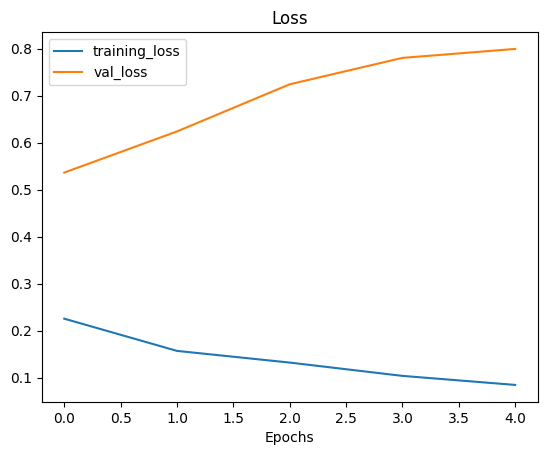

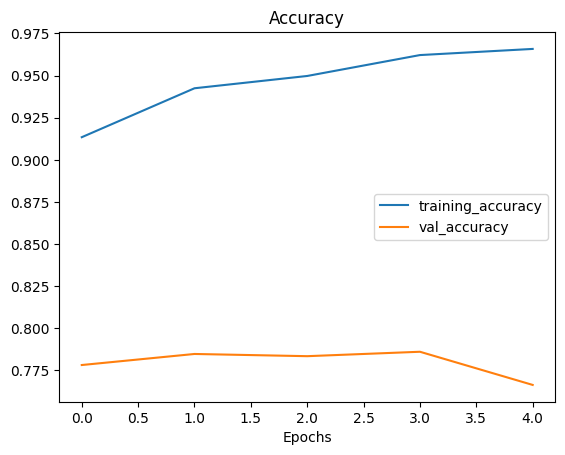

In [40]:
# Get loss curves
from helper_functions import plot_loss_curves
plot_loss_curves(model_2_hist)

In [41]:
# Make predicions probs
model_2_preds_probs = model_2.predict(val_sentences)
model_2_preds_probs[:10]


24/24 [==============================] - 0s 3ms/step


array([[1.5556605e-01],
       [7.4243188e-01],
       [9.9951017e-01],
       [7.8414731e-02],
       [8.7959861e-04],
       [9.9515581e-01],
       [7.3465323e-01],
       [9.9960905e-01],
       [9.9950886e-01],
       [3.2228056e-01]], dtype=float32)

In [42]:
# change preds_probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_preds_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

### Calculate results of preds

In [43]:
# calculate results
model_2_res = calculate_results(y_true=val_labels,
                                y_pred=model_2_preds)
model_2_res

{'accuracy': 0.7664041994750657,
 'precision': 0.7672473559947978,
 'recall': 0.7664041994750657,
 'f1_score': 0.7646647680054942}

In [44]:
model_0_res

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

## model_3 Building, fitting (model_2_GRU)

### Creating model

In [45]:
from tensorflow.keras.layers import GRU, GlobalAveragePooling1D, Input, Dense
from tensorflow.keras import Model

# Building model_2
inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)

# Create RNN_LSTM layer
x = GRU(64)(x)
# x = LSTM(64, return_sequences=True)(x)
# x = GlobalAveragePooling1D()(x)

outputs = Dense(1, activation='sigmoid')(x)
model_3 = Model(inputs, outputs, name='model_2_GRU')

In [46]:
# Get summary of model_3
model_3.summary()

Model: "model_2_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

### Compile and Fitting

In [47]:
# Compile model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_3_hist = model_3.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_3_GRU')])

Saving TensorBoard log files to: save_logs/model_3_GRU/20230922-234629
Epoch 1/5
215/215 [==============================] - 14s 55ms/step - loss: 0.1564 - accuracy: 0.9406 - val_loss: 0.7818 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0824 - accuracy: 0.9708 - val_loss: 0.8772 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0732 - accuracy: 0.9730 - val_loss: 0.9336 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0594 - accuracy: 0.9745 - val_loss: 1.0815 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0500 - accuracy: 0.9777 - val_loss: 1.0923 - val_accuracy: 0.7717


### Making predictions

In [48]:
## predict
model_3_preds_probs = model_3.predict(val_sentences)
model_3_preds_probs[:5]

24/24 [==============================] - 0s 3ms/step


array([[1.7330674e-03],
       [8.6299223e-01],
       [9.9977320e-01],
       [9.9545248e-02],
       [1.1845756e-04]], dtype=float32)

In [49]:
# change preds_probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_preds_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

### Calculate results

In [50]:
# calculate results
model_3_res = calculate_results(y_true=val_labels,
                                y_pred=model_3_preds)
model_3_res

{'accuracy': 0.7716535433070866,
 'precision': 0.7732961359962456,
 'recall': 0.7716535433070866,
 'f1_score': 0.7695827090439606}

In [51]:
model_0_res

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

## Model_4 Building and fitting (model_4 Bidirectional)

### Creating model

In [52]:
from tensorflow.keras.layers import Bidirectional, GlobalAveragePooling1D, Input, Dense
from tensorflow.keras import Model

# Building model_4
inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)

# Create RNN_LSTM layer
x = Bidirectional(LSTM(64))(x) # passingit LSTM ito it
# x = LSTM(64, return_sequences=True)(x)
# x = GlobalAveragePooling1D()(x)

outputs = Dense(1, activation='sigmoid')(x)
model_4 = Model(inputs, outputs, name='model_4_Bidirectional')

### Compiling and fitting

In [53]:
# Compile model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_4_hist = model_4.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_4_Bidirectional')])

Saving TensorBoard log files to: save_logs/model_4_Bidirectional/20230922-234654
Epoch 1/5
215/215 [==============================] - 16s 57ms/step - loss: 0.1097 - accuracy: 0.9647 - val_loss: 0.9315 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0514 - accuracy: 0.9780 - val_loss: 1.3135 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0449 - accuracy: 0.9799 - val_loss: 1.2063 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0435 - accuracy: 0.9807 - val_loss: 1.3116 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0456 - accuracy: 0.9803 - val_loss: 1.1439 - val_accuracy: 0.7638


### Making preds

In [54]:
## predict
model_4_preds_probs = model_4.predict(val_sentences)
model_4_preds_probs[:5]

24/24 [==============================] - 1s 3ms/step


array([[7.1728909e-03],
       [6.9141167e-01],
       [9.9996758e-01],
       [2.4486086e-01],
       [2.1933726e-04]], dtype=float32)

In [55]:
# change preds_probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_preds_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

### calculate results

In [56]:
# calculate results
model_4_res = calculate_results(y_true=val_labels,
                                y_pred=model_4_preds)
model_4_res

{'accuracy': 0.7637795275590551,
 'precision': 0.7669591618844255,
 'recall': 0.7637795275590551,
 'f1_score': 0.760774054689911}

In [57]:
model_0_res

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

## Model_5 Building, fitting (model_5 conv1D)

### Creating model

In [58]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Input, Dense
from tensorflow.keras import Model

# Building model_5
inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)

# Create Conv1D layer
x = Conv1D(filters=32,
           kernel_size=5,
           activation='relu',
           padding='valid')(x)
x = GlobalMaxPooling1D()(x)

outputs = Dense(1, activation='sigmoid')(x)
model_5 = Model(inputs, outputs, name='model_5_conv1D')

### Compiling and fitting modeL

In [59]:
# Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_5_hist = model_5.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_5_conv1D')])

Saving TensorBoard log files to: save_logs/model_5_conv1D/20230922-234722
Epoch 1/5
215/215 [==============================] - 18s 55ms/step - loss: 0.1379 - accuracy: 0.9625 - val_loss: 0.8505 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0789 - accuracy: 0.9717 - val_loss: 0.9794 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0623 - accuracy: 0.9774 - val_loss: 1.0930 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0559 - accuracy: 0.9774 - val_loss: 1.1737 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0523 - accuracy: 0.9791 - val_loss: 1.2390 - val_accuracy: 0.7585


In [60]:
# predict
model_5_preds_probs = model_5.predict(val_sentences)
model_5_preds_probs[:5]

24/24 [==============================] - 0s 3ms/step


array([[8.7681018e-02],
       [7.7161658e-01],
       [9.9989748e-01],
       [8.7994166e-02],
       [4.1192614e-08]], dtype=float32)

### Calculate results

In [61]:
# change preds_probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [62]:
# calculate results
model_5_res = calculate_results(y_true=val_labels,
                                y_pred=model_5_preds)
model_5_res

{'accuracy': 0.7585301837270341,
 'precision': 0.7598294832351254,
 'recall': 0.7585301837270341,
 'f1_score': 0.7563403360005101}

## Model_6 Building model that preatrine from tensorhub


### Loaing oretrained model and creting model

In [63]:
# load our pretrained model
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

# Create model
model_6 = Sequential([
    sentence_encoder_layer,
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# get summary
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


### Compiling and fitting our model_6

In [64]:
# Compile model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_6_hist = model_6.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_6_pretrained_model')])

Saving TensorBoard log files to: save_logs/model_6_pretrained_model/20230922-234808
Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.5058 - accuracy: 0.7797 - val_loss: 0.4472 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4139 - accuracy: 0.8164 - val_loss: 0.4398 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4013 - accuracy: 0.8212 - val_loss: 0.4386 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3923 - accuracy: 0.8270 - val_loss: 0.4310 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3865 - accuracy: 0.8275 - val_loss: 0.4300 - val_accuracy: 0.8136


### Making predictions

In [65]:
# predict
model_6_preds_probs = model_6.predict(val_sentences)
model_6_preds_probs[:5]

24/24 [==============================] - 1s 9ms/step


array([[0.17199558],
       [0.78609425],
       [0.9905605 ],
       [0.22239374],
       [0.77952296]], dtype=float32)

In [66]:
# change preds_probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_preds_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

### Calculate results

In [67]:
# calculate results
model_6_res = calculate_results(y_true=val_labels,
                                y_pred=model_6_preds)
model_6_res

{'accuracy': 0.8136482939632546,
 'precision': 0.8154780111837241,
 'recall': 0.8136482939632546,
 'f1_score': 0.8122606576223605}

In [68]:
model_0_res

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

## Preperaing a subset of our data

In [69]:
# Solving data leakge
train_10_percent = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent]
train_labels_10_percent = train_labels[:train_10_percent]

In [70]:
train_sentences_10_percent[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [72]:
# Showing number of targets
import pandas as pd
import numpy as np
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [73]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Building model_7 like as model_6 using `clone_model`

In [74]:
# clone model_6 for model_7
model_7 = tf.keras.models.clone_model(model_6)

In [75]:
# Show our model
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [76]:
# Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting model
model_7_hist = model_7.fit(x=train_sentences,
                           y=train_labels,
                           epochs=5,
                           validation_data=(val_sentences, val_labels),
                           callbacks=[create_tensorboard_callback(dir_name='save_logs',
                                                                  experiment_name='model_7_clone_model')])

Saving TensorBoard log files to: save_logs/model_7_clone_model/20230922-234923
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.5118 - accuracy: 0.7790 - val_loss: 0.4451 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4154 - accuracy: 0.8151 - val_loss: 0.4345 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4005 - accuracy: 0.8196 - val_loss: 0.4297 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3924 - accuracy: 0.8288 - val_loss: 0.4262 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3856 - accuracy: 0.8295 - val_loss: 0.4323 - val_accuracy: 0.8123


## Compare Results

In [81]:
all_model_res = pd.DataFrame({"0. baseline":model_0_res,
                              '1. model_1':model_1_res,
                              '2. model_2_LSTM':model_2_res,
                              '3. model_3_GRU':model_3_res,
                              '4. model_4_Bidir':model_4_res,
                              '5. model_5_Conv1D':model_5_res,
                              '6. model_6_pretrained':model_6_res})
all_model_res

,0. baseline,1. model_1,2. model_2_LSTM,3. model_3_GRU,4. model_4_Bidir,5. model_5_Conv1D,6. model_6_pretrained
accuracy,0.792651,0.788714,0.766404,0.771654,0.763780,0.758530,0.813648
precision,0.811139,0.793474,0.767247,0.773296,0.766959,0.759829,0.815478
recall,0.792651,0.788714,0.766404,0.771654,0.763780,0.758530,0.813648
f1_score,0.786219,0.785814,0.764665,0.769583,0.760774,0.756340,0.812261


In [82]:
all_model_res = all_model_res.transpose()
all_model_res

,accuracy,precision,recall,f1_score
0. baseline,0.792651,0.811139,0.792651,0.786219
1. model_1,0.788714,0.793474,0.788714,0.785814
2. model_2_LSTM,0.766404,0.767247,0.766404,0.764665
3. model_3_GRU,0.771654,0.773296,0.771654,0.769583
4. model_4_Bidir,0.763780,0.766959,0.763780,0.760774
5. model_5_Conv1D,0.758530,0.759829,0.758530,0.756340
6. model_6_pretrained,0.813648,0.815478,0.813648,0.812261


In [83]:
# Sort on f1_score
all_model_res.sort_values(by=['f1_score'], ascending=False)

,accuracy,precision,recall,f1_score
6. model_6_pretrained,0.813648,0.815478,0.813648,0.812261
0. baseline,0.792651,0.811139,0.792651,0.786219
1. model_1,0.788714,0.793474,0.788714,0.785814
3. model_3_GRU,0.771654,0.773296,0.771654,0.769583
2. model_2_LSTM,0.766404,0.767247,0.766404,0.764665
4. model_4_Bidir,0.763780,0.766959,0.763780,0.760774
5. model_5_Conv1D,0.758530,0.759829,0.758530,0.756340


<Axes: >

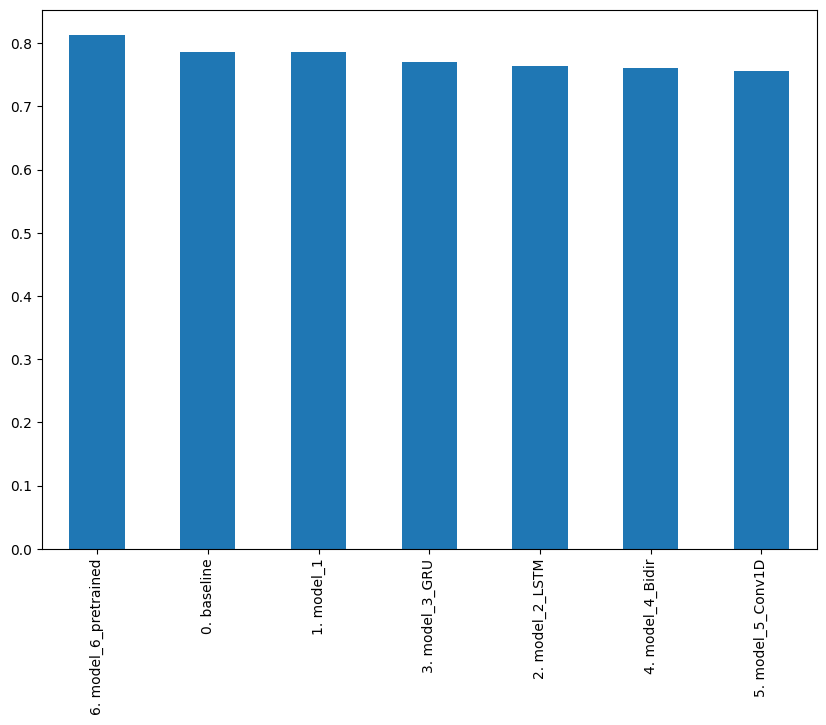

In [87]:
# Visualize on f1_score
all_model_res.sort_values(by=['f1_score'], ascending=False)['f1_score'].plot(kind='bar', figsize=(10, 7))

## Comapre on tensorboard

In [88]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./save_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2023-09-23 00:00:08.926441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./save_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   KML-KNL-HZB



New experiment created. View your TensorBoard at: https://tensorboard.dev/experime